In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime


In [2]:
dataparse=lambda x: datetime.strptime(x,'%d-%m-%Y')
df1= pd.read_csv("BhartiAirtel.csv",parse_dates=['Date'],date_parser=dataparse)
df1.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BHARTIARTL,EQ,2020-08-17,528.60,530.55,532.5,518.10,520.85,521.40,523.23,19014347,9.948886e+09,211145,6393700,33.63
1,BHARTIARTL,EQ,2020-08-18,521.40,522.05,529.1,520.15,527.85,526.30,524.33,13517889,7.087860e+09,162875,4610638,34.11
2,BHARTIARTL,EQ,2020-08-19,526.30,529.00,539.9,527.10,536.00,535.85,533.14,17075491,9.103644e+09,162156,6909210,40.46
3,BHARTIARTL,EQ,2020-08-20,535.85,531.00,533.6,522.70,526.00,525.55,527.19,13440102,7.085519e+09,117408,5901272,43.91
4,BHARTIARTL,EQ,2020-08-21,525.55,529.80,529.8,516.00,519.00,520.25,521.89,21835588,1.139585e+10,205334,8336609,38.18


In [3]:
df2=df1.drop(['% Dly Qt to Traded Qty','Series','Turnover','Symbol'],axis='columns')
df2.head()

,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,No. of Trades,Deliverable Qty
0,2020-08-17,528.60,530.55,532.5,518.10,520.85,521.40,523.23,19014347,211145,6393700
1,2020-08-18,521.40,522.05,529.1,520.15,527.85,526.30,524.33,13517889,162875,4610638
2,2020-08-19,526.30,529.00,539.9,527.10,536.00,535.85,533.14,17075491,162156,6909210
3,2020-08-20,535.85,531.00,533.6,522.70,526.00,525.55,527.19,13440102,117408,5901272
4,2020-08-21,525.55,529.80,529.8,516.00,519.00,520.25,521.89,21835588,205334,8336609


In [4]:
df2.isnull().sum()


Date                     0
Prev Close               0
Open Price               0
High Price               0
Low Price                0
Last Price               0
Close Price              0
Average Price            0
Total Traded Quantity    0
No. of Trades            0
Deliverable Qty          0
dtype: int64

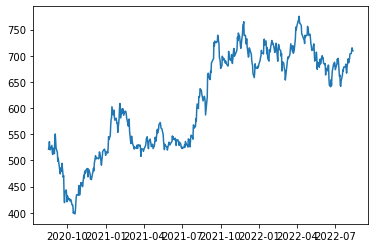

In [5]:
plt.plot(df2['Date'],df2['Close Price'])
plt.show()

In [6]:
type(df2.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [7]:
airtel_close=df2['Close Price']

In [8]:
airtel_close.reset_index(drop=True,inplace=True)
airtel_close.shape

(497,)

In [9]:
airtel_close=pd.DataFrame(airtel_close)

In [10]:
train=airtel_close.iloc[:480]
test=airtel_close.iloc[480:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

In [12]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [13]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [14]:
test.shape

(17, 1)

In [15]:
length = 17
batch_size=32
generator = TimeseriesGenerator(scaled_train,scaled_train,
                                length=length,batch_size=batch_size )

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM, Dropout
n_features=1

In [17]:
model= Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 30)                960       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit_generator(generator,epochs=10,shuffle=False)

C:\Users\a\AppData\Local\Temp\ipykernel_16212\3531706309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


Epoch 1/10
15/15 [==============================] - 3s 8ms/step - loss: 0.1657
Epoch 2/10
15/15 [==============================] - 0s 8ms/step - loss: 0.1188
Epoch 3/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0364
Epoch 4/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0242
Epoch 5/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0203
Epoch 6/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0171
Epoch 7/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0154
Epoch 8/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0141
Epoch 9/10
15/15 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 10/10
15/15 [==============================] - 0s 7ms/step - loss: 0.0121


In [20]:
first_eval_batch=scaled_train[-length:]

In [21]:
first_eval_batch

array([[0.75737531],
       [0.74996693],
       [0.76756185],
       [0.76002117],
       [0.72959386],
       [0.75195132],
       [0.75869824],
       [0.78383384],
       [0.76491599],
       [0.78700886],
       [0.69546236],
       [0.7019447 ],
       [0.65035058],
       [0.64545575],
       [0.67231115],
       [0.70207699],
       [0.72813864]])

In [22]:
first_eval_batch=first_eval_batch.reshape((1,length,1))

In [23]:
first_eval_batch

array([[[0.75737531],
        [0.74996693],
        [0.76756185],
        [0.76002117],
        [0.72959386],
        [0.75195132],
        [0.75869824],
        [0.78383384],
        [0.76491599],
        [0.78700886],
        [0.69546236],
        [0.7019447 ],
        [0.65035058],
        [0.64545575],
        [0.67231115],
        [0.70207699],
        [0.72813864]]])

In [24]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 492ms/step


array([[0.6400799]], dtype=float32)

In [25]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 47ms/step


In [26]:
test_predictions

[array([0.6400799], dtype=float32),
 array([0.65041625], dtype=float32),
 array([0.75188386], dtype=float32),
 array([0.8013905], dtype=float32),
 array([0.694301], dtype=float32),
 array([0.5995021], dtype=float32),
 array([0.67044973], dtype=float32),
 array([0.7666628], dtype=float32),
 array([0.78162634], dtype=float32),
 array([0.6929318], dtype=float32),
 array([0.58115286], dtype=float32),
 array([0.5989494], dtype=float32),
 array([0.7504638], dtype=float32),
 array([0.861905], dtype=float32),
 array([0.6823284], dtype=float32),
 array([0.430828], dtype=float32),
 array([0.5006761], dtype=float32)]

In [27]:
true_predictions=scaler.inverse_transform(test_predictions)

In [28]:
true_predictions

array([[639.61820407],
       [643.52482358],
       [681.87450655],
       [700.58555031],
       [660.11106642],
       [624.28181365],
       [651.09647686],
       [687.46019637],
       [693.11567661],
       [659.59356295],
       [617.34672206],
       [624.07291544],
       [681.33778706],
       [723.45698672],
       [655.58601991],
       [560.53144452],
       [586.93053029]])

In [29]:
test['predictions']=true_predictions

C:\Users\a\AppData\Local\Temp\ipykernel_16212\2081619921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions']=true_predictions


In [30]:
test

,Close Price,predictions
480,670.65,639.618204
481,678.35,643.524824
482,678.85,681.874507
483,678.40,700.585550
484,684.10,660.111066
485,674.90,624.281814
486,666.85,651.096477
487,677.95,687.460196
488,694.45,693.115677
489,686.80,659.593563


<AxesSubplot:>

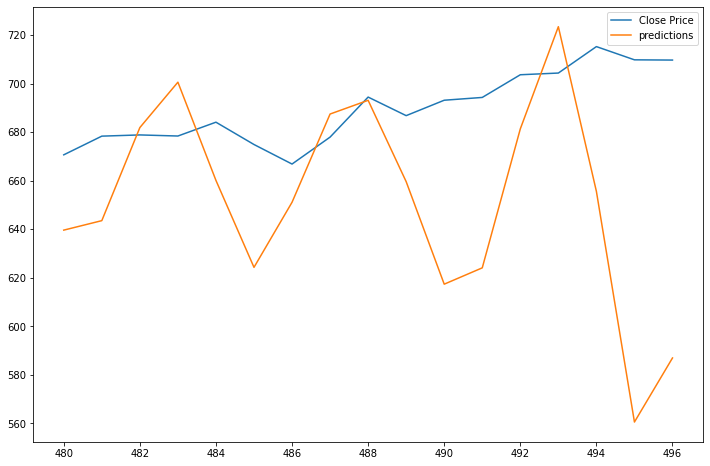

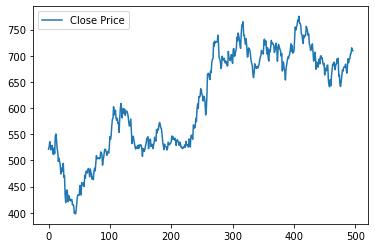

In [31]:
test.plot(figsize=(12,8))
airtel_close.plot()

In [32]:
full_scaler=MinMaxScaler()
scaled_full_data=full_scaler.fit_transform(airtel_close)

In [33]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length=16,
                                batch_size=32 )

In [34]:
model= Sequential()
model.add(SimpleRNN(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [35]:
model.fit_generator(generator,epochs=10,shuffle=False)

Epoch 1/10


C:\Users\a\AppData\Local\Temp\ipykernel_16212\3531706309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=10,shuffle=False)


16/16 [==============================] - 3s 8ms/step - loss: 0.0803
Epoch 2/10
16/16 [==============================] - 0s 8ms/step - loss: 0.1237
Epoch 3/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0196
Epoch 4/10
16/16 [==============================] - 0s 8ms/step - loss: 0.0216
Epoch 5/10
16/16 [==============================] - 0s 8ms/step - loss: 0.0160
Epoch 6/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0144
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0129
Epoch 8/10
16/16 [==============================] - 0s 8ms/step - loss: 0.0121
Epoch 9/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0123
Epoch 10/10
16/16 [==============================] - 0s 7ms/step - loss: 0.0124


<AxesSubplot:>

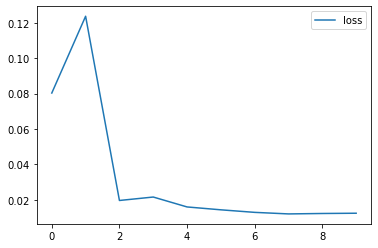

In [36]:
full_model_losses=pd.DataFrame(model.history.history)
full_model_losses.plot()

In [37]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))
for i in range(20):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 50ms/step


In [38]:
forecast=scaler.inverse_transform(forecast)

In [39]:
forecast

array([[577.80074598],
       [558.41359335],
       [557.37169299],
       [545.64122399],
       [532.39957143],
       [523.16764709],
       [467.35180544],
       [440.87876727],
       [421.06564213],
       [403.33842969],
       [381.75292642],
       [354.26188683],
       [331.57304487],
       [290.06618414],
       [258.78297358],
       [251.10220798],
       [208.70808179],
       [190.18651747],
       [179.56427001],
       [145.62546379]])

In [40]:
forecast.flatten()

array([577.80074598, 558.41359335, 557.37169299, 545.64122399,
       532.39957143, 523.16764709, 467.35180544, 440.87876727,
       421.06564213, 403.33842969, 381.75292642, 354.26188683,
       331.57304487, 290.06618414, 258.78297358, 251.10220798,
       208.70808179, 190.18651747, 179.56427001, 145.62546379])

In [41]:
df_array=np.array(airtel_close)
df_array

array([[521.4 ],
       [526.3 ],
       [535.85],
       [525.55],
       [520.25],
       [526.9 ],
       [528.65],
       [514.5 ],
       [511.15],
       [523.45],
       [513.1 ],
       [546.25],
       [550.55],
       [538.  ],
       [523.15],
       [515.45],
       [498.1 ],
       [504.25],
       [497.35],
       [491.65],
       [474.1 ],
       [485.55],
       [481.75],
       [479.  ],
       [494.55],
       [467.75],
       [470.95],
       [433.8 ],
       [419.3 ],
       [439.65],
       [443.65],
       [435.6 ],
       [420.95],
       [432.35],
       [424.45],
       [426.75],
       [422.45],
       [424.45],
       [425.2 ],
       [415.05],
       [415.3 ],
       [413.25],
       [399.2 ],
       [401.65],
       [397.7 ],
       [405.  ],
       [419.  ],
       [430.65],
       [434.4 ],
       [434.05],
       [433.35],
       [451.85],
       [450.8 ],
       [433.75],
       [457.4 ],
       [454.6 ],
       [453.05],
       [457.3 ],
       [449.9 

In [42]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<AxesSubplot:>

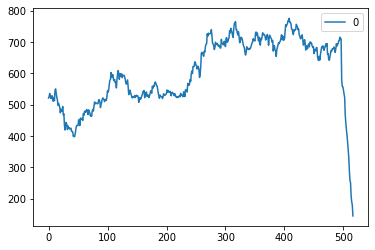

In [43]:
full_data.plot()

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=2)

In [45]:
length =16
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,
                                batch_size=32 )
validation_generator=TimeseriesGenerator(scaled_test,scaled_test,length=length,
                                batch_size=32 )

In [46]:
model= Sequential()

model.add(LSTM(30,input_shape=(length,n_features)))
model.add(Dropout(rate=0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [47]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,
                    callbacks=[early_stop],shuffle=False)

Epoch 1/20


C:\Users\a\AppData\Local\Temp\ipykernel_16212\399513501.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=20,validation_data=validation_generator,


15/15 [==============================] - 7s 125ms/step - loss: 0.1516 - val_loss: 0.1070
Epoch 2/20
15/15 [==============================] - 0s 19ms/step - loss: 0.0127 - val_loss: 5.1716e-05
Epoch 3/20
15/15 [==============================] - 0s 20ms/step - loss: 0.0220 - val_loss: 0.0095
Epoch 4/20
15/15 [==============================] - 0s 19ms/step - loss: 0.0173 - val_loss: 0.0051


<AxesSubplot:>

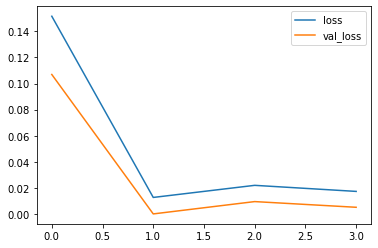

In [48]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [49]:
test_predictions=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,1))
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 43ms/step


In [50]:
true_predictions=scaler.inverse_transform(test_predictions)

In [51]:
true_predictions

array([[662.15517356],
       [661.58961878],
       [660.8974365 ],
       [660.30167224],
       [659.85006193],
       [659.35794704],
       [658.87964156],
       [658.35565015],
       [657.92467511],
       [657.44627951],
       [657.27205124],
       [657.05632718],
       [656.99115491],
       [656.9143584 ],
       [656.74028783],
       [656.48058994],
       [656.1605632 ]])

C:\Users\a\AppData\Local\Temp\ipykernel_16212\1803299671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM predictions']=true_predictions


<AxesSubplot:>

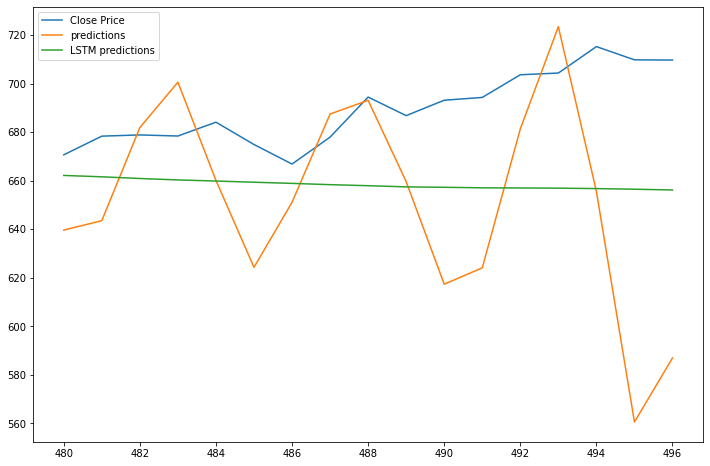

In [52]:
test['LSTM predictions']=true_predictions
test.plot(figsize=(12,8))

In [53]:
forecast=[]
first_eval_batch=scaled_train[-length:]
current_batch=first_eval_batch.reshape((1,length,n_features))
for i in range(15):
    current_pred=model.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 40ms/step


In [54]:
forecast=scaler.inverse_transform(forecast)

In [55]:
full_data=pd.DataFrame(np.concatenate((df_array.flatten(),forecast.flatten())))

<AxesSubplot:>

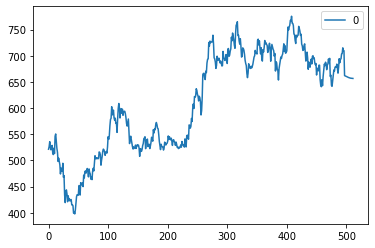

In [56]:
full_data.plot()

In [57]:
forecast

array([[662.15517356],
       [661.58961878],
       [660.8974365 ],
       [660.30167224],
       [659.85006193],
       [659.35794704],
       [658.87964156],
       [658.35565015],
       [657.92467511],
       [657.44627951],
       [657.27205124],
       [657.05632718],
       [656.99115491],
       [656.9143584 ],
       [656.74028783]])